In [111]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score, confusion_matrix,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [13]:
wines = pd.read_csv('winequality-red.csv', sep=';')
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [32]:
X_Fix_Acidity = wines['fixed acidity'].values
X_Fix_Acidity=X_Fix_Acidity.reshape(-1,1)
X_Fix_Acidity.shape

(1599, 1)

In [33]:
y = wines.quality.values
y = y.reshape(-1,1)
y.shape

(1599, 1)

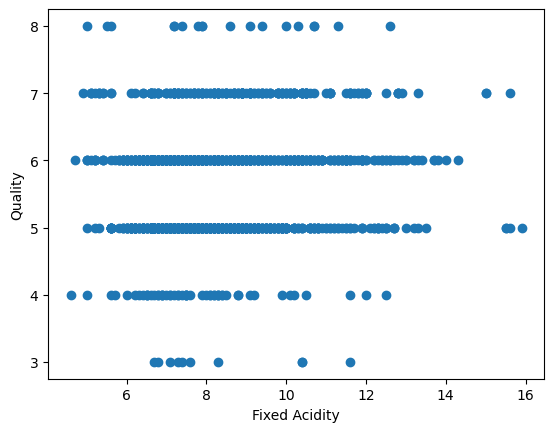

In [36]:
plt.scatter(X_Fix_Acidity,y)
plt.ylabel('Quality')
plt.xlabel('Fixed Acidity')
plt.show()

In [63]:
#X_train , X_test, y_train, y_test = train_test_split(X_Fix_Acidity,y,test_size=0.2,random_state=56)
model = LinearRegression()
model.fit(X_Fix_Acidity,y)

LinearRegression()

In [64]:
pred = model.predict(X_Fix_Acidity)

In [131]:
#help(plt.scatter)

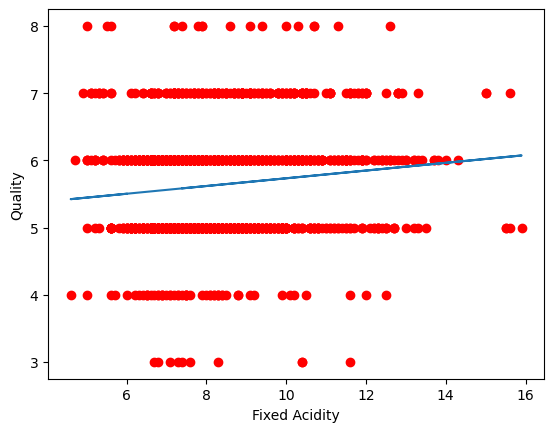

In [130]:
plt.scatter(X_Fix_Acidity, y, color='r')
plt.plot(X_Fix_Acidity, pred)
plt.ylabel("Quality")
plt.xlabel("Fixed Acidity")
plt.show()

In [69]:
X = wines.drop('quality',axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=56)

In [70]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [75]:
pre = reg.predict(X_test)
print(X_train.shape,y_train.shape)

(1279, 11) (1279, 1)


In [76]:
#plt.scatter(X_train, y_train)
#plt.plot(y_test, pred)
#plt.ylabel("Quality")
#plt.xlabel("Fixed Acidity")
#plt.show()

In [78]:
reg.score(X_test,y_test)

0.38386932742001556

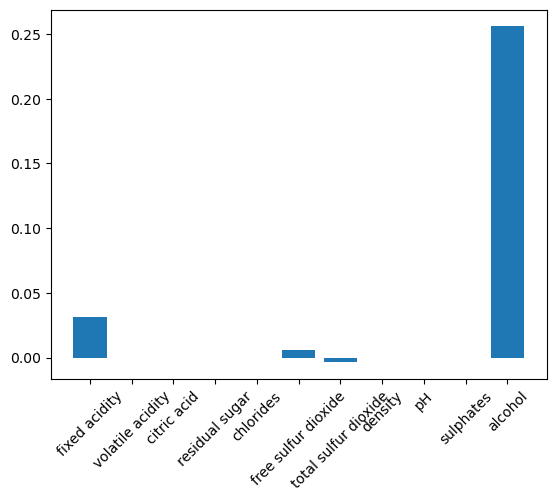

In [83]:
from sklearn.linear_model import Lasso
X = wines.drop("quality", axis=1).values
y = wines.quality.values

names = wines.drop("quality", axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

In [85]:
from sklearn.tree import DecisionTreeRegressor

In [89]:
X_alcohol = wines.alcohol.values
X_alcohol = X_alcohol.reshape(-1,1)
X_alcohol

array([[ 9.4],
       [ 9.8],
       [ 9.8],
       ...,
       [11. ],
       [10.2],
       [11. ]])

In [91]:
X_trai, X_tes, y_trai , y_tes = train_test_split(X_alcohol,y,test_size=0.2, random_state=56)
tre = DecisionTreeRegressor()
tre.fit(X_trai,y_trai)

DecisionTreeRegressor()

In [107]:
preduction = tre.predict(X_tes)
print(y_tes, preduction)

[6 6 7 6 4 6 6 7 5 5 7 5 5 6 5 7 5 5 8 7 5 6 6 6 6 6 5 6 5 6 4 5 6 6 5 6 5
 5 6 5 6 5 5 6 7 6 5 6 5 3 5 5 5 5 6 5 7 6 6 7 5 6 6 5 6 6 5 6 5 6 5 6 5 7
 7 5 7 6 6 7 5 6 6 5 7 6 5 5 6 6 6 5 4 6 5 6 5 4 6 6 6 6 5 5 6 5 5 5 6 6 5
 6 5 5 5 4 5 5 5 6 6 4 4 5 5 5 5 6 6 7 5 6 6 5 7 6 7 6 6 6 6 7 5 6 5 5 6 5
 5 5 6 6 5 6 6 7 6 5 5 5 6 7 5 5 4 5 6 5 5 5 5 5 6 6 7 5 6 6 6 4 6 6 6 7 6
 5 6 8 5 4 5 5 7 6 5 7 5 6 5 6 5 6 5 5 5 6 5 5 5 5 6 7 5 6 6 7 5 5 6 6 5 6
 6 5 5 6 6 8 5 5 5 6 5 5 6 7 5 6 6 4 5 6 5 6 7 6 6 5 5 6 5 6 5 6 5 7 7 5 5
 6 7 5 6 6 5 5 6 6 5 6 6 6 7 5 6 5 7 5 5 5 6 6 6 5 5 5 5 4 6 7 6 6 5 5 5 5
 5 5 6 5 6 7 4 7 5 6 7 6 5 6 7 5 6 5 7 6 5 6 7 6] [5.69230769 5.62962963 5.71428571 5.60606061 5.71428571 5.54054054
 5.48780488 6.23529412 5.19480519 5.19480519 6.24       5.24
 5.19480519 7.         6.23529412 5.53703704 5.59090909 5.19480519
 5.75510204 6.52941176 5.24       6.         5.54054054 5.16666667
 5.68       6.10714286 5.48780488 5.24       5.3030303  6.10714286
 5.27659574 5.24     

In [113]:
#accuracy_score(y_tes,preduction)
#confusion_matrix(y_tes,preduction)

In [123]:
r2 = r2_score(y_tes, preduction)

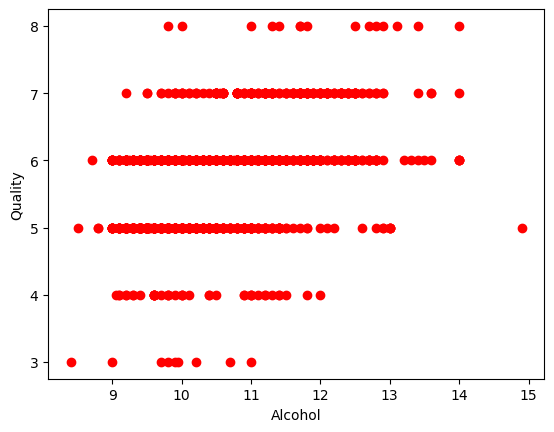

In [127]:
plt.scatter(X_trai, y_trai, color='red')

# Labels
plt.ylabel("Quality")
plt.xlabel("Alcohol")

# Show plot
plt.show()

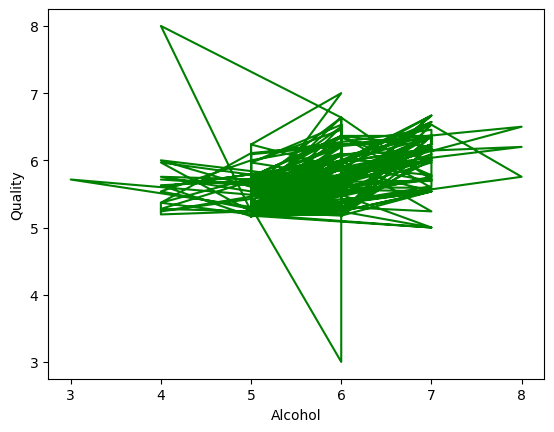

In [126]:
plt.plot(y_tes, preduction, color='green')
# Labels
plt.ylabel("Quality")
plt.xlabel("Alcohol")

# Show plot
plt.show()

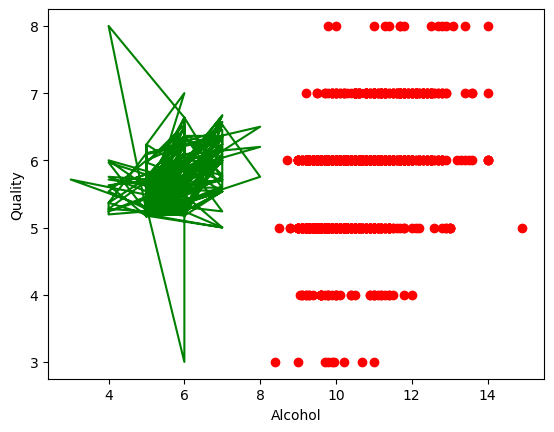

In [129]:
plt.scatter(X_trai, y_trai, color='red')
plt.plot(y_tes, preduction, color='green')
# Labels
plt.ylabel("Quality")
plt.xlabel("Alcohol")

# Show plot
plt.show()